In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import lines
import lib_hipstar
from matplotlib2tikz import save as tikz_save

In [4]:
cd ~/

/home/rp3e11


In [19]:
cases=['HPT_500k/HPT_LS05_DOM30_TI5/','HPT_500k/HPT_LS05_DOM30_TI20/','HPT_500k/HPT_LS20_DOM80_TI5/',
       'HPT_500k/HPT_LS20_DOM80_TI20/','HPT_1M/DOM30_LS05_TI10/','HPT_1M/DOM30_LS05_TI30/']
labels=['R500k\_T5\_L5','R500k\_T20\_L5','R500k\_T5\_L20','R500k\_T20\_L20','R1M\_T10\_L5','R1M\_T30\_L5']
infiles=['cascade3d_post.in','cascade3d_post.in','cascade3d_post.in','cascade3d_post.in','NEW_vki.in','NEW_vki.in']
n_c=len(cases)

In [8]:
inlet_lines=[]

x0=-0.9
x1=-0.1
n_lines=40
y0=np.linspace(-0.4,1.1,num=n_lines)
averages=np.zeros([n_c,100,4])
test=lines.lines()
i=0
filen=cases[i]+'/case_sel/STAT_cont'
test.extr_line([x0,y0[1]],[x1,y0[i]],100,filename=filen,infile='%s/cascade3d.in'%cases[i])
t11=test.l[0].var.get_index(101,10)
for c in range(n_c):
    inlet_lines.append(lines.lines())
    filen=cases[c]+'/case_sel/STAT_cont'
    for i in range(n_lines):
        inlet_lines[-1].extr_line([x0,y0[1]],[x1,y0[i]],100,filename=filen,infile='%s/%s'%(cases[c],infiles[c]))
        averages[c,:,:]+=inlet_lines[-1].l[0].data[:,t11:t11+4]
averages/=n_lines

Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously ex

Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously extracted
Reading file in CGNS format
reading data from file previously ex

In [9]:
#compute turbulent intensity
TI=np.empty([n_c,100,3])
TI[:,:,0]=np.sqrt(-averages[:,:,0])
TI[:,:,1]=np.sqrt(-averages[:,:,2])
TI[:,:,2]=np.sqrt(-averages[:,:,3])

<IPython.core.display.Javascript object>


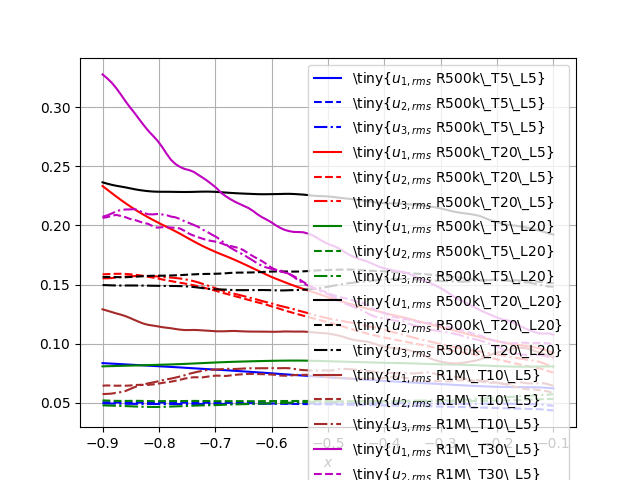

file encoding: None
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


In [20]:
plt.figure()
colors=['b','r','g','k','brown','m']
lst=['-','--','-.']
for c in range(n_c):
    for i in range(3):
        plt.plot(inlet_lines[c].l[0].data[:,0],TI[c,:,i],linestyle=lst[i],color=colors[c],
                 label='\\tiny{$u_{%i,rms}$ %s}'%(i+1,labels[c]))
plt.xlabel('$x$')
plt.grid()
plt.legend()
tikz_save('inlet_turb_decay_1M.tikz',figurewidth='\\fw',figureheight='\\fh')